In [1]:
import sys
import os
import collections
from collections import defaultdict
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import re
from tabula import read_pdf
import csv

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

import requests
from bs4 import BeautifulSoup

plt.rcParams['figure.figsize'] = (15, 8)  # Width=15, Height=8

In [3]:
# Load University Admission datasets
unibuc_cti = pd.read_csv('./ADMITERi CSV/UNIBUC_CTI_INFO_2024.csv')  # UNIBUC CTI+INFO
unibuc_mate = pd.read_csv('./ADMITERi CSV/UNIBUC_MATE_2024.csv')  # UNIBUC MATE
snspa = pd.read_csv('./ADMITERi CSV/SNSPA_2024.csv')  # SNSPA
psiho = pd.read_csv('./ADMITERi CSV/PSIHOLOGIE_2024.csv')  # PSIHOLOGIE
jurnalism = pd.read_csv('./ADMITERi CSV/JURNALISM_2024.csv')  # JURNALISM
drept = pd.read_csv('./ADMITERi CSV/DREPT_clean_2024.csv')  # DREPT
arhitectura = pd.read_csv('./ADMITERi CSV/ARHITECTURA_clean_2024.csv')  # ARHITECTURA
geografie = pd.read_csv('./ADMITERi CSV/GEOGRAFIE_2024.csv')  # GEOGRAFIE
upb_acs = pd.read_csv('./ADMITERi CSV/UPB_ACS_2014.csv')  # UPB ACS
umfcd = pd.read_csv('./ADMITERi CSV/UMFCD_2019.csv')  # UMFCD

# ARHITECTURA_clean_2024.csv  GEOGRAFIE_2024.csv  PSIHOLOGIE_2024.csv  UMFCD_2019.csv            UNIBUC_MATE_2024.csv
# DREPT_clean_2024.csv        JURNALISM_2024.csv  SNSPA_2024.csv       UNIBUC_CTI_INFO_2024.csv  UPB_ACS_2014.csv

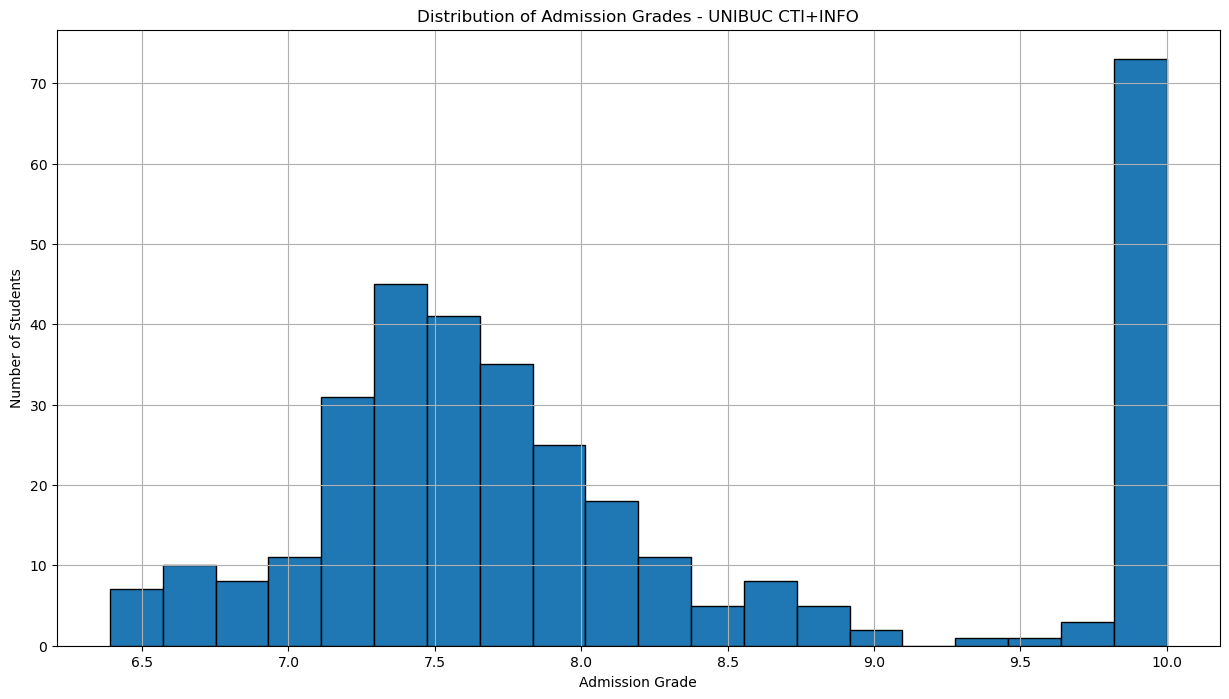

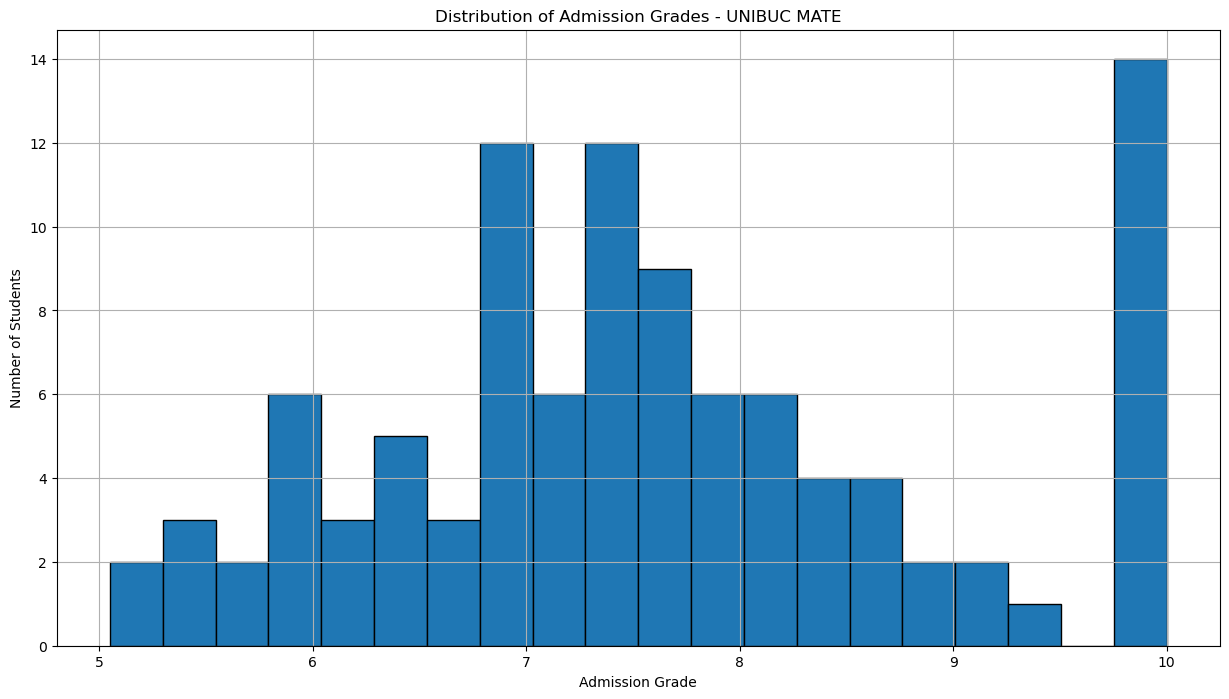

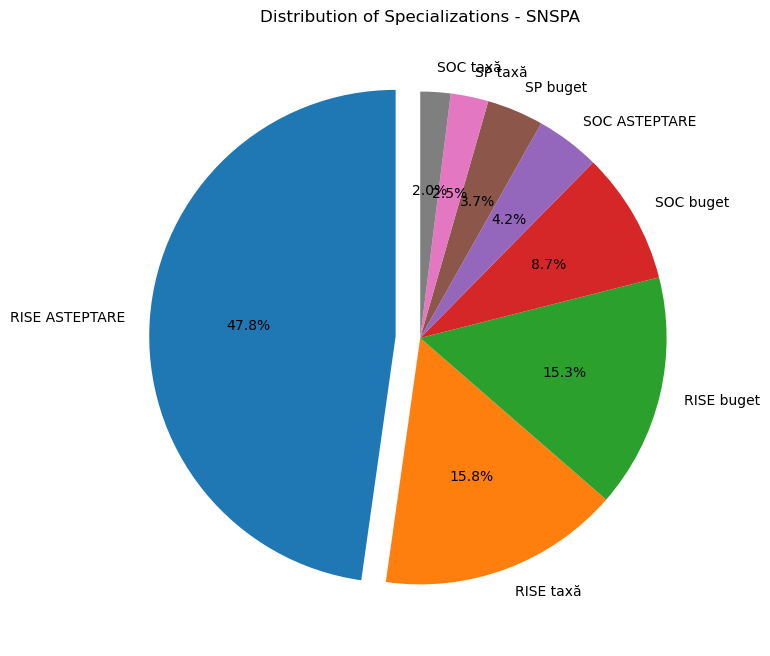

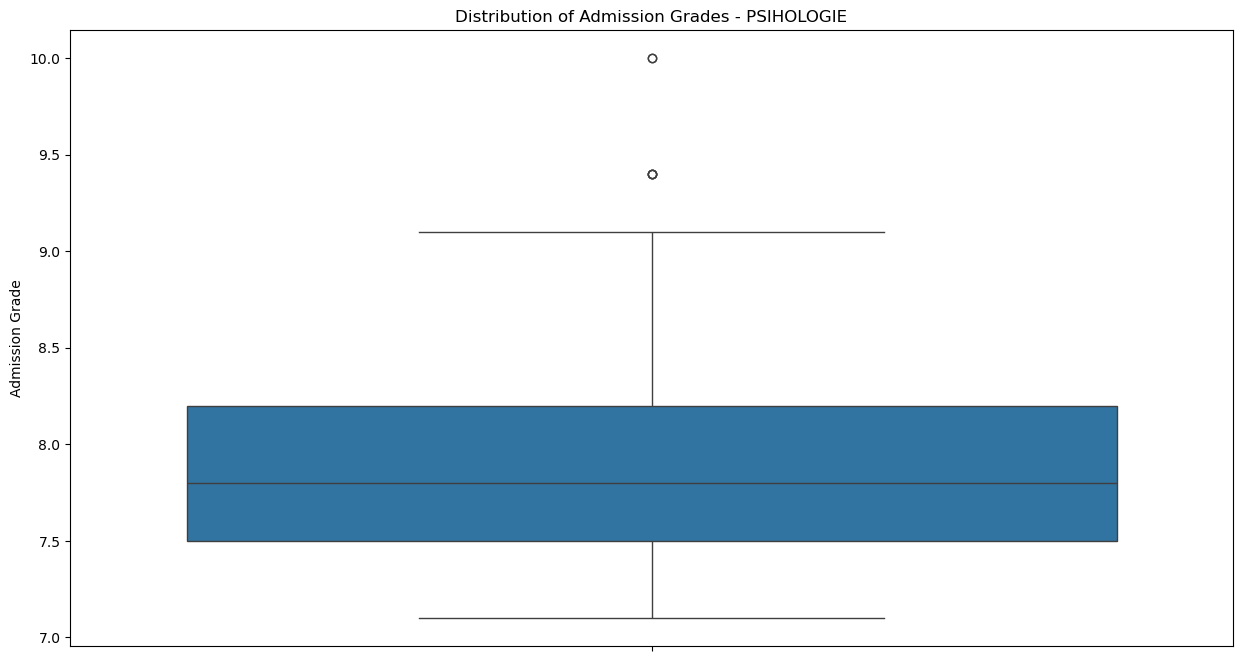

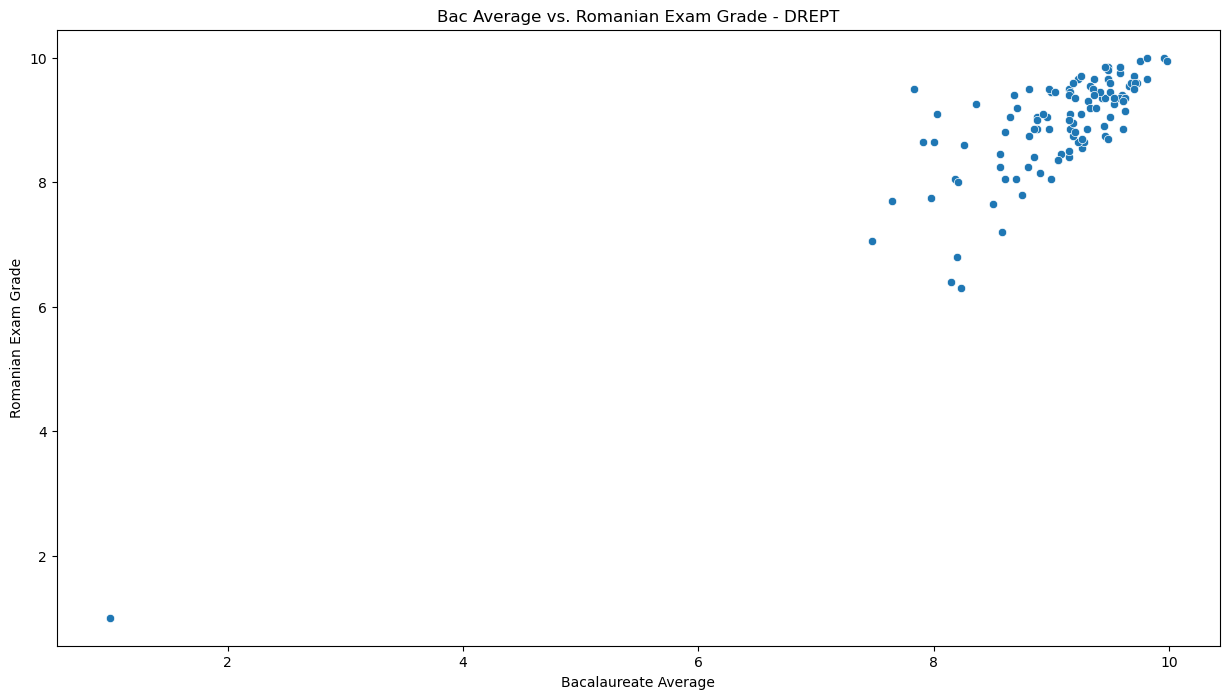

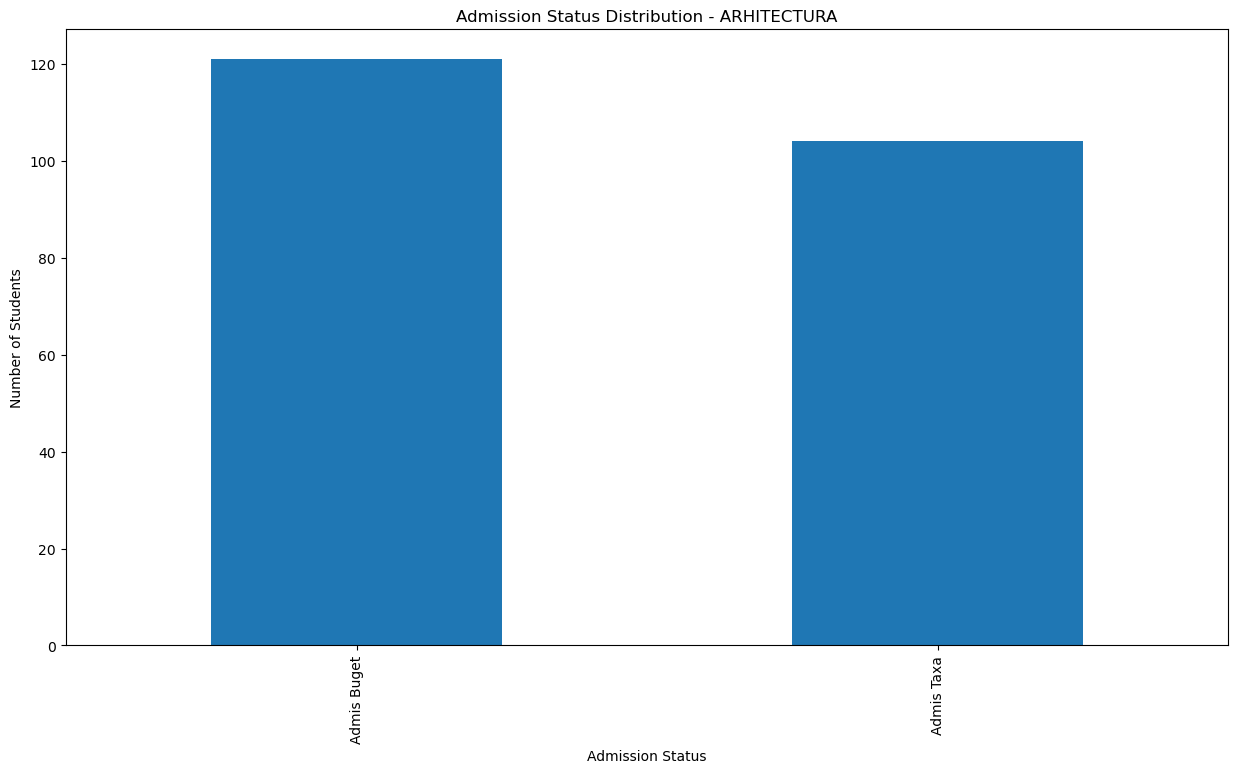

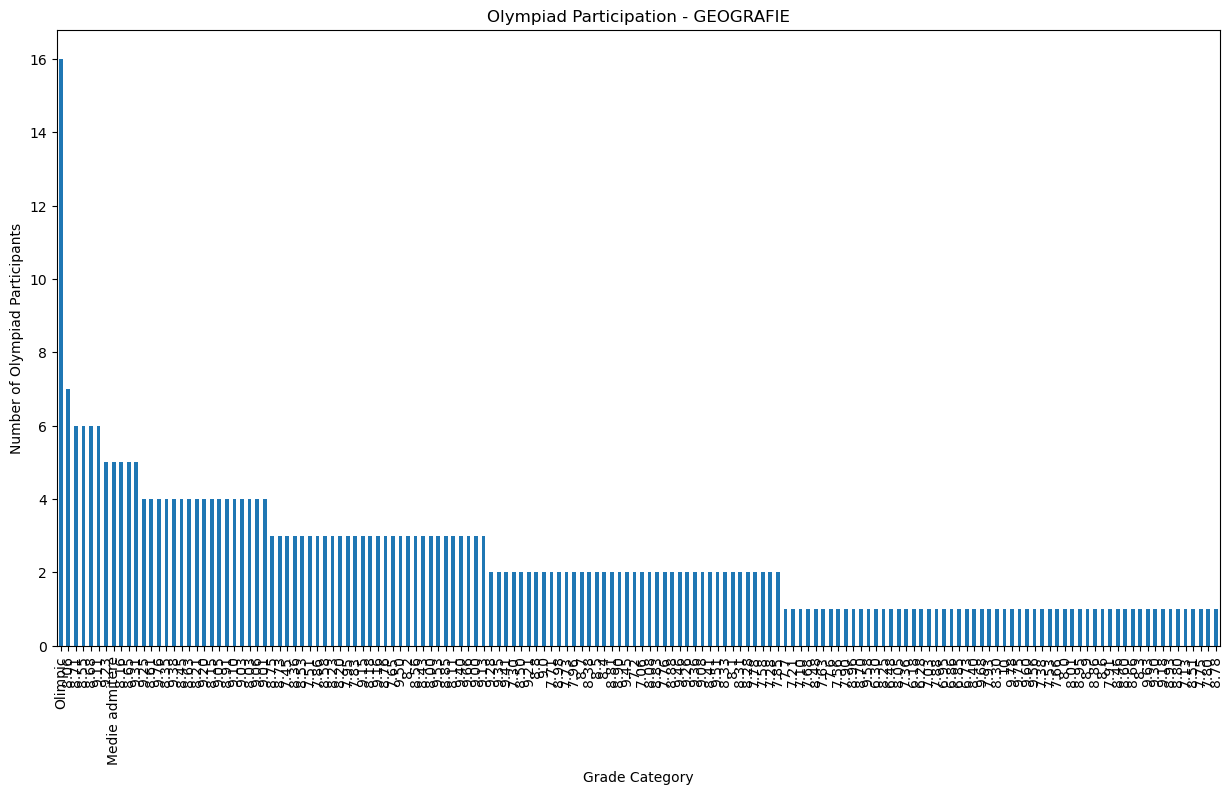

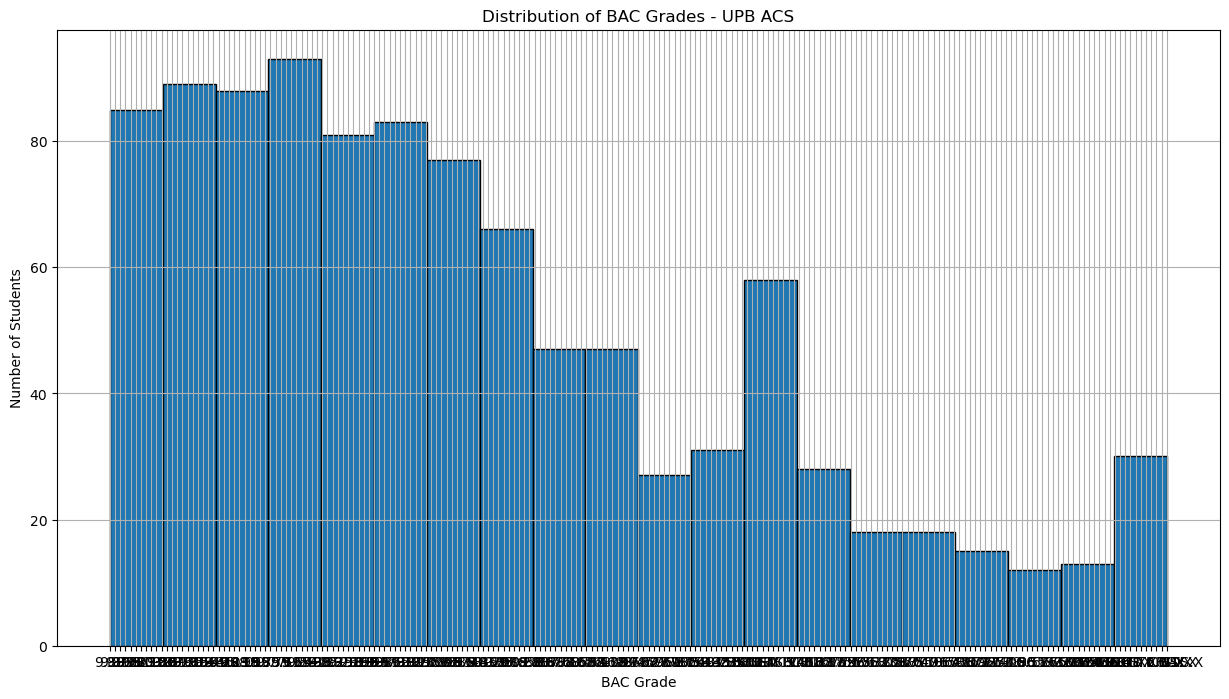

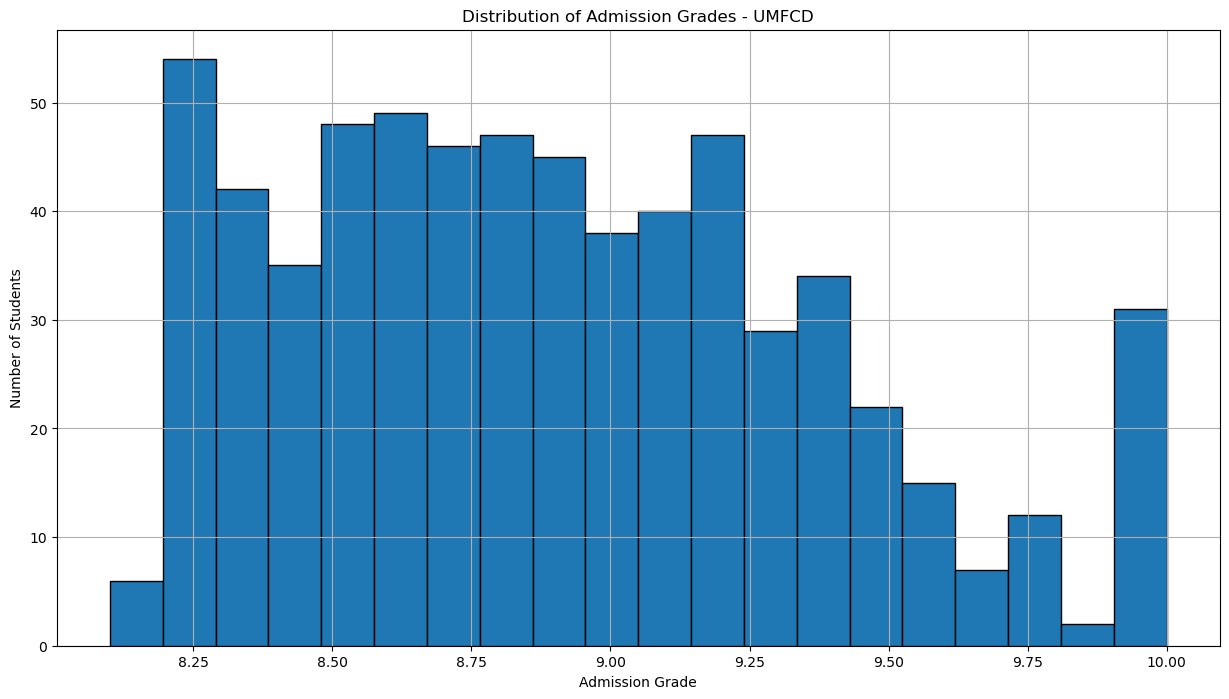

In [6]:
# 1. Histogram of Admission Grades for UNIBUC CTI+INFO
plt.figure()
unibuc_cti['Medie'].hist(bins=20, edgecolor='black')
plt.xlabel('Admission Grade')
plt.ylabel('Number of Students')
plt.title('Distribution of Admission Grades - UNIBUC CTI+INFO')
plt.show()

# 2. Histogram of Admission Grades for UNIBUC MATE
plt.figure()
unibuc_mate['Medie'].hist(bins=20, edgecolor='black')
plt.xlabel('Admission Grade')
plt.ylabel('Number of Students')
plt.title('Distribution of Admission Grades - UNIBUC MATE')
plt.show()

# 3. Pie Chart of Specializations in SNSPA
plt.figure()
specializations_counts = snspa['Specializare'].value_counts()
explode = [0.1] + [0] * (len(specializations_counts) - 1)
specializations_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=explode)
plt.ylabel('')
plt.title('Distribution of Specializations - SNSPA')
plt.show()

# 4. Boxplot of Admission Grades in PSIHOLOGIE
plt.figure()
sns.boxplot(y='Medie admitere', data=psiho)
plt.ylabel('Admission Grade')
plt.title('Distribution of Admission Grades - PSIHOLOGIE')
plt.show()

# 5. Scatter Plot - Medie BAC vs. Nota Română for DREPT
plt.figure()
sns.scatterplot(x='Medie BAC', y='Nota Română', data=drept)
plt.xlabel('Bacalaureate Average')
plt.ylabel('Romanian Exam Grade')
plt.title('Bac Average vs. Romanian Exam Grade - DREPT')
plt.show()

# 6. Bar Plot of Admission Status in ARHITECTURA
plt.figure()
arhitectura['Status'].value_counts().plot(kind='bar')
plt.xlabel('Admission Status')
plt.ylabel('Number of Students')
plt.title('Admission Status Distribution - ARHITECTURA')
plt.show()

# 7. Bar Plot of Olympiad Participants in GEOGRAFIE
plt.figure()
geografie['Medie BAC'].value_counts().plot(kind='bar')
plt.xlabel('Grade Category')
plt.ylabel('Number of Olympiad Participants')
plt.title('Olympiad Participation - GEOGRAFIE')
plt.show()

# 8. Histogram of BAC Grades for UPB ACS
plt.figure()
upb_acs['BAC'].hist(bins=20, edgecolor='black')
plt.xlabel('BAC Grade')
plt.ylabel('Number of Students')
plt.title('Distribution of BAC Grades - UPB ACS')
plt.show()

# 9. Histogram of Admission Grades for UMFCD
plt.figure()
umfcd['Nota'].hist(bins=20, edgecolor='black')
plt.xlabel('Admission Grade')
plt.ylabel('Number of Students')
plt.title('Distribution of Admission Grades - UMFCD')
plt.show()